In [99]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , accuracy_score,roc_auc_score, roc_curve, confusion_matrix,precision_recall_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns



In [100]:
df = pd.read_csv('data.csv')
df.head()
df.shape
df['diagnosis'].value_counts()
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [101]:
#When axis=0, it refers to operations along the rows 
#When axis=1, it refers to operations along the columns 

# Drop the first column (ID column)
df = df.drop(df.columns[0], axis=1)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [102]:
# Select all columns except the first as the feature set
X = df.iloc[:, 1:]
# Assign the first column as the target variable
y = df.iloc[:, 0]

#convert these to numpy arrays
feature_set_array = X.values
target_variable_array = y.values
feature_set_array[0:4]
y



0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [103]:
#fit(): This method computes the mean and standard deviation of each feature in the dataset 
#transform(): This method transforms the dataset using the computed mean and standard deviation.
# Scale the feature set
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [104]:
X_train , X_test , y_train , y_test = train_test_split(X_scaled , y , test_size=0.2 , random_state=4)


In [105]:
# gamma dah el byhded el curveture bta3 el khat ely hyfsel maben el classes

classifier = svm.SVC (kernel='linear' , gamma='auto', C=2)
classifier.fit(X_train , y_train)

SVC(C=2, gamma='auto', kernel='linear')

In [106]:
y_predict = classifier.predict(X_test)
y_predict

array(['B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M',
       'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B',
       'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'M', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B'], dtype=object)

In [107]:
print(classification_report(y_test , y_predict))

              precision    recall  f1-score   support

           B       1.00      0.97      0.99        80
           M       0.94      1.00      0.97        34

    accuracy                           0.98       114
   macro avg       0.97      0.99      0.98       114
weighted avg       0.98      0.98      0.98       114



In [108]:
# Accuracy
accuracy = accuracy_score(y_test, y_predict)
print("Accuracy:", accuracy)

Accuracy: 0.9824561403508771


In [109]:
#fit_transform() During the fitting step, the method learns parameters from the data (like the mean and standard deviation for scaling
# or the mapping between categories and numerical values for label encoding).
# Convert categorical labels to numerical labels
label_encoder = LabelEncoder()
y_test_numeric = label_encoder.fit_transform(y_test)

In [124]:
#transofrm It's used when you have already fitted a transformation on a training dataset
# Convert predicted labels to numerical labels
y_predict_numeric = label_encoder.transform(y_predict)


ROC AUC Score: 0.9874999999999999


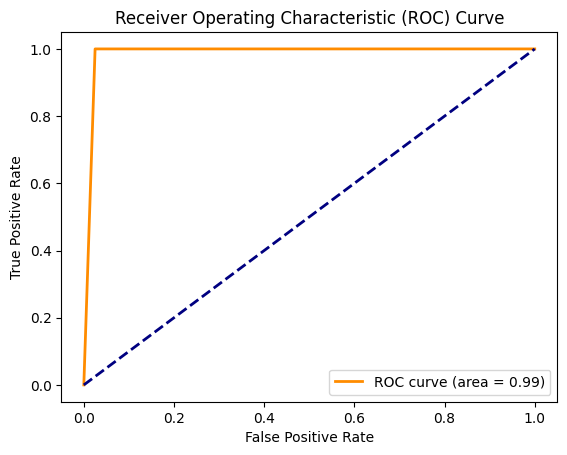

In [111]:
# ROC Curve and AUC
roc_auc = roc_auc_score(y_test_numeric, y_predict_numeric)
print("ROC AUC Score:", roc_auc)

fpr, tpr, _ = roc_curve(y_test_numeric, y_predict_numeric)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [112]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_predict)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[78  2]
 [ 0 34]]


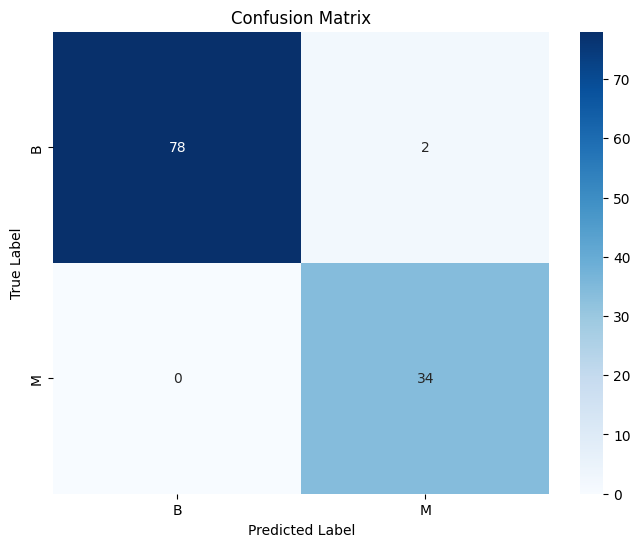

In [122]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test_numeric, y_predict_numeric)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

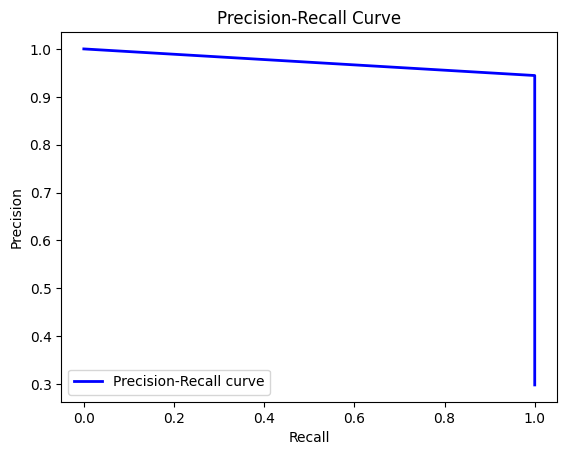

In [114]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test_numeric, y_predict_numeric)
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

In [115]:
import tkinter as tk
from tkinter import messagebox  # Import messagebox module separately
from sklearn.preprocessing import StandardScaler

def create_gui():
    window = tk.Tk()
    window.title("Data Input Form")

    # Padding for the entire application
    app_padding = 20

    # List of labels for the input fields
    labels = [
        "radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean",
        "compactness_mean", "concavity_mean", "concave_points_mean", "symmetry_mean", "fractal_dimension_mean",
        "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se",
        "compactness_se", "concavity_se", "concave_points_se", "symmetry_se", "fractal_dimension_se",
        "radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst",
        "compactness_worst", "concavity_worst", "concave_points_worst", "symmetry_worst", "fractal_dimension_worst"
    ]

    # Create a dictionary to hold the Entry widgets
    entries = {}

    # Define dimensions
    input_width = 30  # Approximate width for the input fields
    num_columns = 3
    spacing = 10

    # Create Frame for the first row (input fields and labels)
    input_frame = tk.Frame(window)
    input_frame.pack(side=tk.TOP, pady=app_padding, padx=app_padding)

    # Create labels and entry fields in a grid for the first row
    for index, label_text in enumerate(labels):
        row = index // num_columns
        column = index % num_columns
        label = tk.Label(input_frame, text=label_text)
        label.grid(row=row, column=column*2, sticky=tk.W, padx=spacing, pady=spacing)

        entry = tk.Entry(input_frame, width=input_width)
        entry.grid(row=row, column=column*2+1, padx=spacing, pady=spacing)
        entries[label_text] = entry

    # Submit button
    submit_button = tk.Button(window, text="Submit", command=lambda: submit(entries))
    submit_button.pack(side=tk.BOTTOM, pady=app_padding, padx=app_padding)  # Padding added to top, bottom, left, and right

    window.mainloop()

def submit(entries):
    # Function to handle submission of data
    data_list = []
    for label, entry in entries.items():
        value = entry.get().strip()  # Get the entry value and remove leading/trailing whitespace
        if not value:
            # If the entry is empty
            messagebox.showerror("Error", "Please fill all empty cells")
            return  # Exit the function early if any error occurs
        try:
            value = float(value)  # Try converting to float
            data_list.append(value)
        except ValueError:
            # If conversion to float fails, it's not a valid numeric value
            messagebox.showerror("Error", "Please enter valid numeric values")
            return  # Exit the function early if any error occurs
    print("Data submitted as list:", data_list)
    # Continue with the rest of your code (scaling and prediction)
    scaler = StandardScaler()
    data_array = np.array(data_list).reshape(1, -1)  # Convert data list to array and reshape for scaler
    scaled_data = scaler.fit_transform(data_array)
    y_predict = classifier.predict(scaled_data)
    
    # Display prediction to the user
    messagebox.showinfo("Prediction", f"The predicted value is: {y_predict}")

create_gui()
